Un magazin este vizitat de 𝑛 clienţi într-o anumită zi. Numărul 𝑌 de clienţi care cumpără un anumit produs
e distribuit Binomial(𝑛, 𝜃 ), unde 𝜃 este probabilitatea ca un client să cumpere acel produs. Să presupunem că
îl cunoaştem pe 𝜃 şi că distribuţia a priori pentru 𝑛 este Poisson(10).
1. Folosiţi PyMC pentru a calcula distribuţia a posteriori pentru 𝑛 pentru toate combinaţiile de 𝑌 ∈
{0, 5, 10} şi 𝜃 ∈ {0.2, 0.5}. Folosiţi az.plot_posterior pentru a vizualiza toate rezultatele (ideal, într-
o singură fereastră).

In [ ]:
pip install pymc arviz matplotlib

Output()

Output()

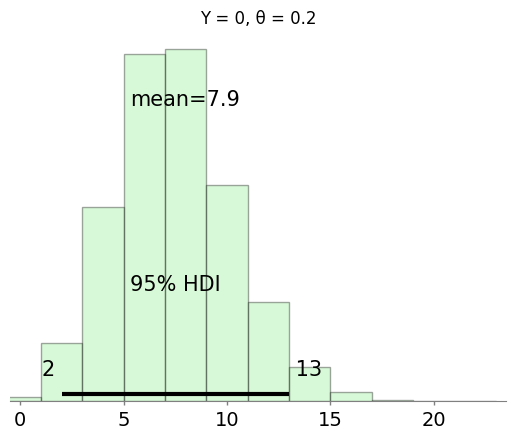

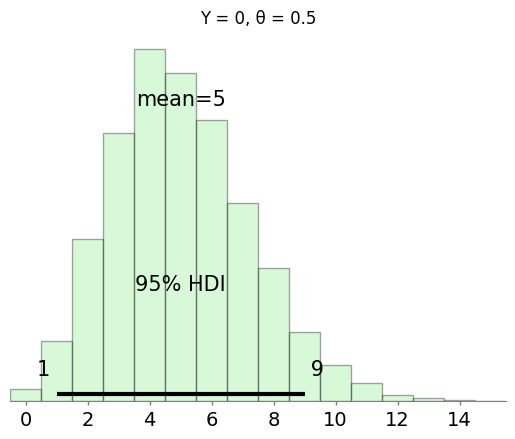

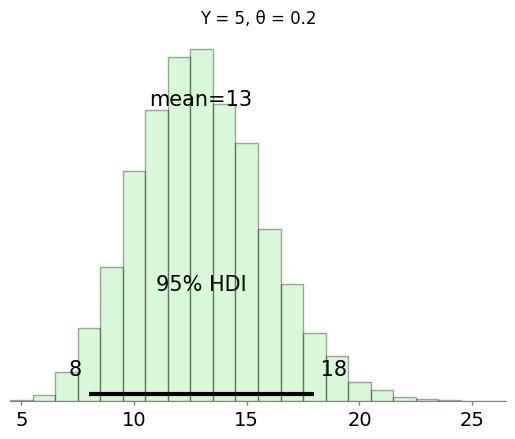

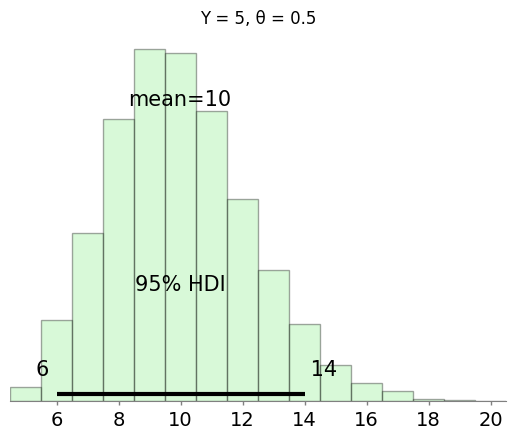

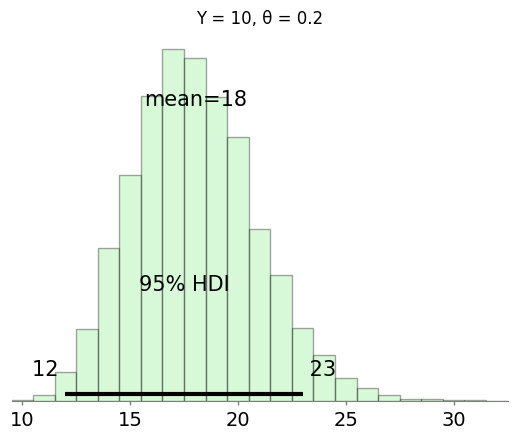

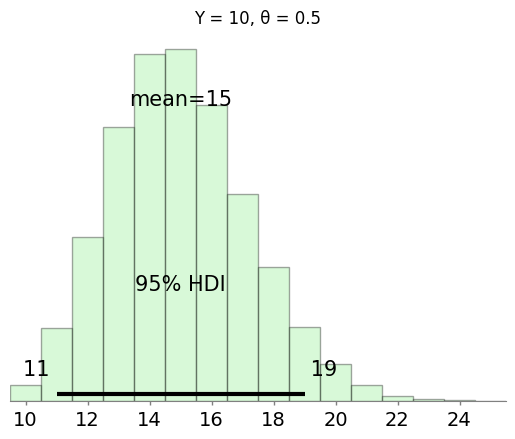

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

np.random.seed(12)
Y = np.array([0,0,5,5,10,10])
theta = np.array([0.2, 0.5, 0.2, 0.5, 0.2, 0.5])

with pm.Model() as model:
    n = pm.Poisson('n', mu=10, shape=6)
    y = pm.Binomial('y', n=n, p=theta, observed=Y)
    trace = pm.sample(10000, tune = 1000, return_inferencedata=True)

for i in range(6):
    az.plot_posterior(trace, var_names=['n'],coords={'n_dim_0': i}, hdi_prob=0.95, color = 'lightgreen', edgecolor='black')
    plt.title(f'Y = {Y[i]}, θ = {theta[i]}')
plt.show()
